In [67]:
df = None

In [68]:
import re
import pandas as pd
from collections import defaultdict

# Patterns to match LS1 and LS2 lines
pattern = re.compile(r'\[(.*?) \| (LS1|LS2)\] Total Runtime: ([\d.]+) seconds, Collection Size: (\d+), OPT: (\d+), RelErr: ([\d.]+)')

# Data storage
data = defaultdict(lambda: {'LS1': {'time': [], 'size': [], 'relerr': []},
                            'LS2': {'time': [], 'size': [], 'relerr': []}})

for ls in (1,2):
    # Read each ls1_seed{n}.ouut file
    for seed in range(1, 21):
        filename = f'ls{ls}_seed{seed}.out'
        try:
            with open(filename, 'r') as f:
                for line in f:
                    match = pattern.search(line)
                    if match:
                        dataset, ls_type, time, size, _, relerr = match.groups()
                        data[dataset][ls_type]['time'].append(float(time))
                        data[dataset][ls_type]['size'].append(int(size))
                        data[dataset][ls_type]['relerr'].append(float(relerr))
        except FileNotFoundError:
            print(f"File {filename} not found. Skipping.")

# Create rows for each dataset
rows = []
for dataset in sorted(data.keys()):
    ls1 = data[dataset]['LS1']
    ls2 = data[dataset]['LS2']
    
    ls1_time = sum(ls1['time']) / len(ls1['time']) if ls1['time'] else None
    ls1_size = sum(ls1['size']) / len(ls1['size']) if ls1['size'] else None
    ls1_relerr = sum(ls1['relerr']) / len(ls1['relerr']) if ls1['relerr'] else None

    ls2_time = sum(ls2['time']) / len(ls2['time']) if ls2['time'] else None
    ls2_size = sum(ls2['size']) / len(ls2['size']) if ls2['size'] else None
    ls2_relerr = sum(ls2['relerr']) / len(ls2['relerr']) if ls2['relerr'] else None

    rows.append([dataset, ls1_time, ls1_size, ls1_relerr, ls2_time, ls2_size, ls2_relerr])

# Create DataFrame
df = pd.DataFrame(rows, columns=[
    'Dataset', 'LS1_time', 'LS1_size', 'LS1_relerr',
    'LS2_time', 'LS2_size', 'LS2_relerr'
])

# Display or export table
print(df.to_string(index=False))
# Optional: Save to CSV
# df.to_csv("summary_table.csv", index=False)
df1 = df

Dataset  LS1_time  LS1_size  LS1_relerr   LS2_time  LS2_size  LS2_relerr
 large1 40.202070    152.10    2.042000 161.323335    179.90    2.598000
large10 46.024810    398.25    0.802035 121.910410    508.35    1.300230
large11  4.070570     82.60    1.065000  37.369730     97.65    1.441250
large12  0.401540     30.05    1.003325  17.035720     29.60    0.973335
 large2  0.336155     30.90    0.626310  15.954915     29.35    0.544740
 large3  0.432695     30.35    1.023335  17.425530     29.60    0.973340
 large4 24.596955    198.70    1.183520  98.088145    241.40    1.652755
 large5  0.142245     12.20    1.033335  18.075435     10.05    0.675015
 large6  0.177510     12.20    1.033340  18.201330     10.35    0.725000
 large7 45.537945    236.00    1.484220 152.591965    292.20    2.075795
 large8  0.064905      9.15    0.830000  13.236550      8.00    0.600000
 large9  0.429815     30.00    1.142870  17.476890     28.65    1.046430
 small1  0.004210      6.60    0.320000   6.374210 

In [72]:
import pandas as pd
import re
df = None
# Define the path to each file
file_paths = {
    "Approx": "approx_experiment_data.out",
    "BnB": "bnb_30min_experiment_data.out"
}

# Updated regex pattern: allows negative relerr and more flexible matching
pattern = re.compile(
    r"\[(?P<dataset>\w+)\s*\|\s*\w+\]\s*Total Runtime:\s*(?P<time>[\d.]+)\s*seconds,"
    r"\s*Collection Size:\s*(?P<size>\d+),\s*OPT:\s*\d+,\s*RelErr:\s*(?P<relerr>-?[\d.]+)"
)

# Dictionary to hold data per method
data_by_method = {}

# Process each file
for method, path in file_paths.items():
    method_data = {}
    with open(path, "r") as file:
        for line in file:
            match = pattern.search(line)
            if match:
                dataset = match.group("dataset")
                method_data[dataset] = {
                    f"{method}_time": float(match.group("time")),
                    f"{method}_size": int(match.group("size")),
                    f"{method}_relerr": float(match.group("relerr"))
                }
    data_by_method[method] = method_data

# Combine all datasets
all_datasets = set().union(*[set(d.keys()) for d in data_by_method.values()])
rows = []

# Create final combined rows
for dataset in sorted(all_datasets):
    row = {"Dataset": dataset}
    for method in ["BnB", "Approx"]:
        method_data = data_by_method.get(method, {}).get(dataset, {})
        row.update({
            f"{method}_time": method_data.get(f"{method}_time"),
            f"{method}_size": method_data.get(f"{method}_size"),
            f"{method}_relerr": method_data.get(f"{method}_relerr")
        })
    rows.append(row)

# Create DataFrame and save
df = pd.DataFrame(rows)
df.to_csv("all_experiment.csv", index=False)
print("Saved to all_experiment.csv")
print(df.to_string(index=False))
df2=df

Saved to all_experiment.csv
Dataset  BnB_time  BnB_size  BnB_relerr  Approx_time  Approx_size  Approx_relerr
 large1 1800.0017         0     -1.0000       0.1589           83         0.6600
large10 1800.0013         0     -1.0000       0.1121          319         0.4434
large11 1800.0002         0     -1.0000       0.0278           56         0.4000
large12 1800.0001         0     -1.0000       0.0012           18         0.2000
 large2 2145.4898         0     -1.0000       0.0005           21         0.1053
 large3 1970.9798         0     -1.0000       0.0026           17         0.1333
 large4 2051.9020         0     -1.0000       0.0495          153         0.6813
 large5 2719.9063         8      0.3333       0.0015            8         0.3333
 large6 2074.9089         7      0.1667       0.0030            7         0.1667
 large7 2692.8304         0     -1.0000       0.1406          172         0.8105
 large8 2611.8857         5      0.0000       0.0007            6         0.2000


In [78]:
merged_df = pd.merge(df1, df2, on='Dataset', how='inner')

# === Add Optimal column by reading from data/<dataset>.out ===
def read_optimal(dataset_name):
    filepath = f"data/{dataset_name}.out"
    try:
        with open(filepath, 'r') as f:
            value = int(f.readline().strip())  # Assuming optimal value is on the first line
            return value
    except Exception as e:
        print(f"Warning: Failed to read {filepath} — {e}")
        return np.nan

merged_df["Optimal"] = merged_df["Dataset"].apply(read_optimal)

# === Round significant digits for times, errors, and optimal values ===
def round_sig(x, sig=2):
    if pd.isna(x):
        return x
    return round(x, sig - int(np.floor(np.log10(abs(x)))) - 1) if x != 0 else 0

for col in merged_df.columns:
    if 'time' in col.lower() or 'relerr' in col.lower() or 'opt' in col.lower():
        merged_df[col] = merged_df[col].apply(lambda x: round_sig(x, sig=2))

# === Output ===
print(merged_df.to_string(index=False))

Dataset  LS1_time  LS1_size  LS1_relerr  LS2_time  LS2_size  LS2_relerr  BnB_time  BnB_size  BnB_relerr  Approx_time  Approx_size  Approx_relerr  Optimal
 large1  40.00000    152.10       2.000     160.0    179.90       2.600 1800.0000         0       -1.00       0.1600           83           0.66       50
large10  46.00000    398.25       0.800     120.0    508.35       1.300 1800.0000         0       -1.00       0.1100          319           0.44      220
large11   4.10000     82.60       1.100      37.0     97.65       1.400 1800.0000         0       -1.00       0.0280           56           0.40       40
large12   0.40000     30.05       1.000      17.0     29.60       0.970 1800.0000         0       -1.00       0.0012           18           0.20       15
 large2   0.34000     30.90       0.630      16.0     29.35       0.540 2100.0000         0       -1.00       0.0005           21           0.11       19
 large3   0.43000     30.35       1.000      17.0     29.60       0.970 2000

In [79]:
merged_df.to_csv("all_experiment.csv")

In [80]:
df = merged_df

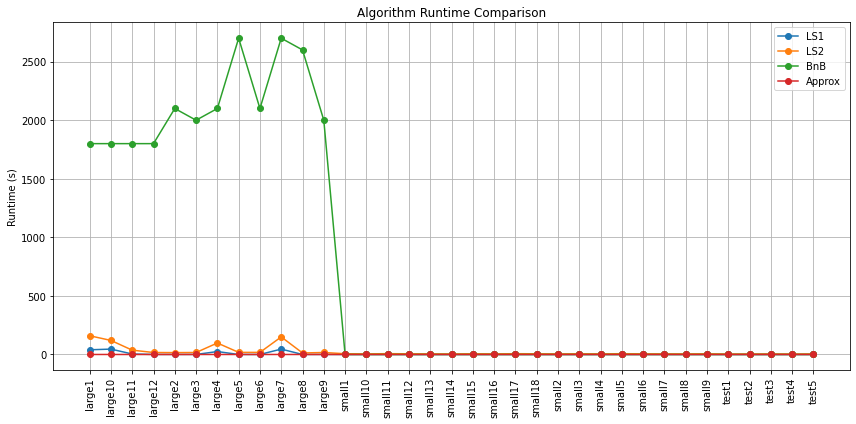

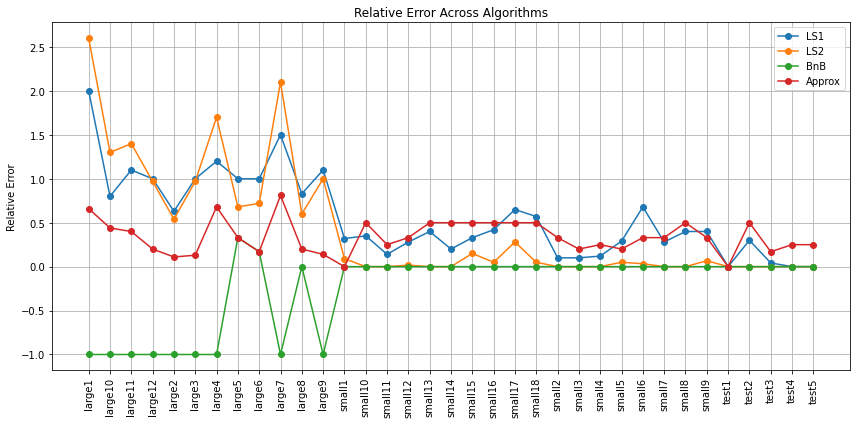

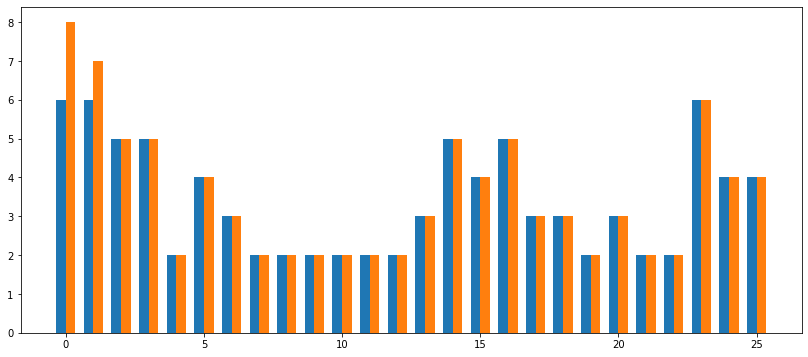

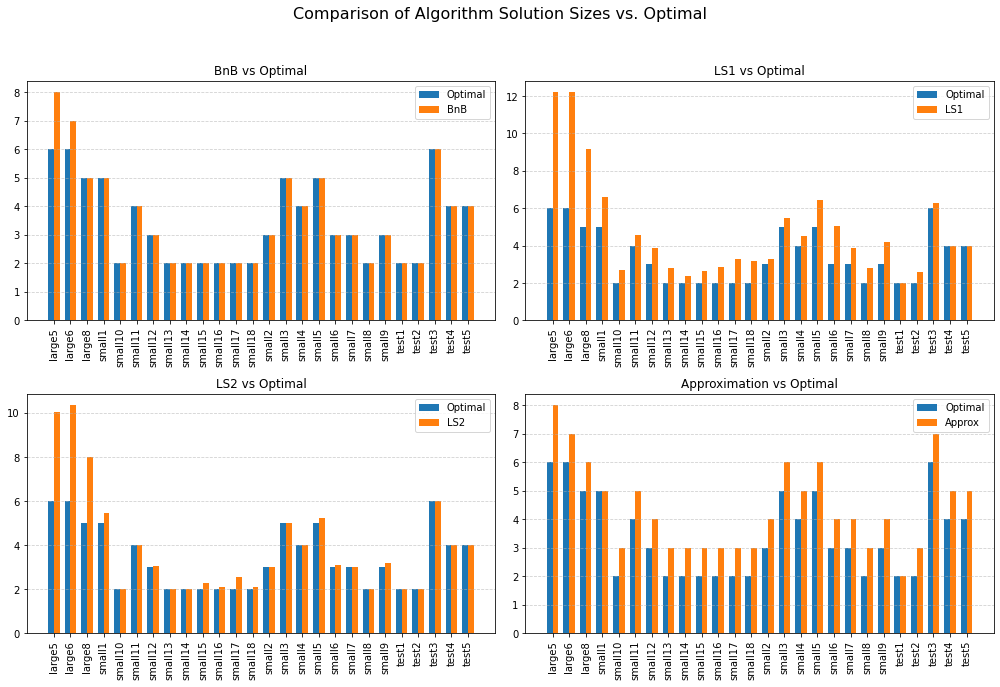

In [82]:
import pandas as pd
import matplotlib.pyplot as plt


# === Optional: Sort by dataset name for consistent x-axis ===
df = df.sort_values("Dataset")

# === Plot 1: Runtime Comparison ===
plt.figure(figsize=(12, 6))
plt.plot(df["Dataset"], df["LS1_time"], label="LS1", marker='o')
plt.plot(df["Dataset"], df["LS2_time"], label="LS2", marker='o')
plt.plot(df["Dataset"], df["BnB_time"], label="BnB", marker='o')
plt.plot(df["Dataset"], df["Approx_time"], label="Approx", marker='o')
plt.xticks(rotation=90)
plt.ylabel("Runtime (s)")
plt.title("Algorithm Runtime Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("runtime_comparison.png")
plt.show()

# === Plot 2: Relative Error Comparison ===
plt.figure(figsize=(12, 6))
plt.plot(df["Dataset"], df["LS1_relerr"], label="LS1", marker='o')
plt.plot(df["Dataset"], df["LS2_relerr"], label="LS2", marker='o')
plt.plot(df["Dataset"], df["BnB_relerr"], label="BnB", marker='o')
plt.plot(df["Dataset"], df["Approx_relerr"], label="Approx", marker='o')
plt.xticks(rotation=90)
plt.ylabel("Relative Error")
plt.title("Relative Error Across Algorithms")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("relative_error_comparison.png")
plt.show()





# Filter out rows where BnB didn't return a valid result (e.g., size == 0 or missing)
valid_bnb = merged_df[(merged_df["BnB_size"] > 0) & (~merged_df["Optimal"].isna())]

# Plotting
x = np.arange(len(valid_bnb))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 6))

bar1 = ax.bar(x - width/2, valid_bnb["Optimal"], width, label='Optimal')
bar2 = ax.bar(x + width/2, valid_bnb["BnB_size"], width, label='BnB Solution')

# Filter valid rows (where Optimal and solution sizes exist)
valid = merged_df[(merged_df["Optimal"] > 0) & (merged_df["BnB_size"] > 0)]

datasets = valid["Dataset"]
x = np.arange(len(datasets))
width = 0.35

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Comparison of Algorithm Solution Sizes vs. Optimal", fontsize=16)

# === 1. BnB vs Optimal ===
axs[0, 0].bar(x - width/2, valid["Optimal"], width, label='Optimal')
axs[0, 0].bar(x + width/2, valid["BnB_size"], width, label='BnB')
axs[0, 0].set_title("BnB vs Optimal")
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(datasets, rotation=90)
axs[0, 0].legend()
axs[0, 0].grid(True, axis='y', linestyle='--', alpha=0.6)

# === 2. LS1 vs Optimal ===
axs[0, 1].bar(x - width/2, valid["Optimal"], width, label='Optimal')
axs[0, 1].bar(x + width/2, valid["LS1_size"], width, label='LS1')
axs[0, 1].set_title("LS1 vs Optimal")
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(datasets, rotation=90)
axs[0, 1].legend()
axs[0, 1].grid(True, axis='y', linestyle='--', alpha=0.6)

# === 3. LS2 vs Optimal ===
axs[1, 0].bar(x - width/2, valid["Optimal"], width, label='Optimal')
axs[1, 0].bar(x + width/2, valid["LS2_size"], width, label='LS2')
axs[1, 0].set_title("LS2 vs Optimal")
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(datasets, rotation=90)
axs[1, 0].legend()
axs[1, 0].grid(True, axis='y', linestyle='--', alpha=0.6)

# === 4. Approx vs Optimal ===
axs[1, 1].bar(x - width/2, valid["Optimal"], width, label='Optimal')
axs[1, 1].bar(x + width/2, valid["Approx_size"], width, label='Approx')
axs[1, 1].set_title("Approximation vs Optimal")
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(datasets, rotation=90)
axs[1, 1].legend()
axs[1, 1].grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for suptitle
plt.savefig("solution_vs_optimal_all.png")
plt.show()

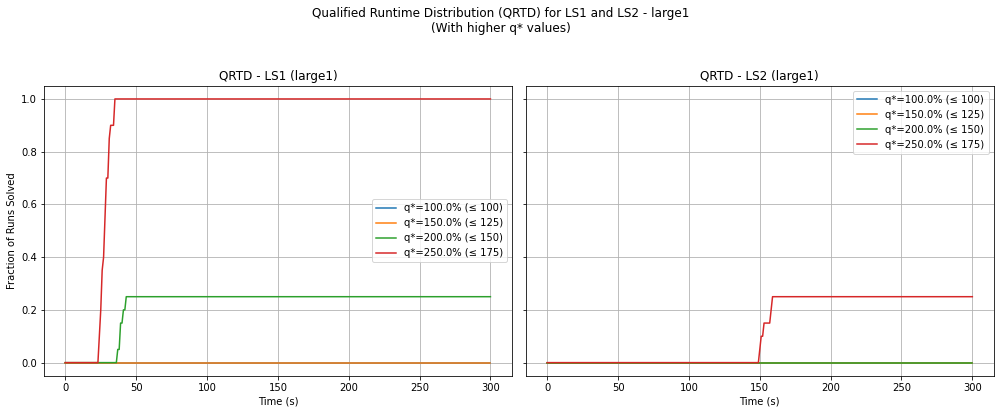

In [34]:
import os
import matplotlib.pyplot as plt
import numpy as np

# === CONFIG ===
opt = 50  # Given optimal
qstars = [100.0, 150.0, 200.0, 250.0]  # Relative errors in %
n_runs = 20
max_time = 300
time_resolution = 1  # seconds
algorithms = {
    "LS1": "ls1_seed",
    "LS2": "ls2_seed"
}

def parse_trace(trace_path):
    times, qualities = [], []
    with open(trace_path, 'r') as f:
        for line in f:
            t, q = line.strip().split()
            times.append(float(t))
            qualities.append(int(q))
    return list(zip(times, qualities))

def get_success_times(trace, threshold):
    for t, q in trace:
        if q <= threshold:
            return t
    return float('inf')

def compute_qrt_curve(algorithm, qstar, dataset='large1'):
    folder_prefix = algorithms[algorithm]
    threshold = opt * (1 + qstar / 100)
    time_grid = np.arange(0, max_time + 1, time_resolution)
    success_times = []

    for seed in range(1, n_runs + 1):
        folder = f"{folder_prefix}{seed}"
        trace_path = f"{folder}/{dataset}_{algorithm}_300_{seed}.trace"
        trace = parse_trace(trace_path)
        success_time = get_success_times(trace, threshold)
        success_times.append(success_time)

    curve = []
    for t in time_grid:
        solved = sum(1 for st in success_times if st <= t)
        curve.append(solved / n_runs)
    return time_grid, curve, threshold

# === PLOTTING ===
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for idx, alg in enumerate(algorithms.keys()):
    ax = axes[idx]
    for qstar in qstars:
        time_grid, curve, threshold = compute_qrt_curve(alg, qstar)
        ax.plot(time_grid, curve, label=f"q*={qstar:.1f}% (≤ {threshold:.0f})")

    ax.set_title(f"QRTD - {alg} (large1)")
    ax.set_xlabel("Time (s)")
    ax.grid(True)
    ax.legend()
    if idx == 0:
        ax.set_ylabel("Fraction of Runs Solved")

plt.suptitle("Qualified Runtime Distribution (QRTD) for LS1 and LS2 - large1\n(With higher q* values)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("QRTD_large1_LS1_LS2_high_qstar.png")
plt.show()


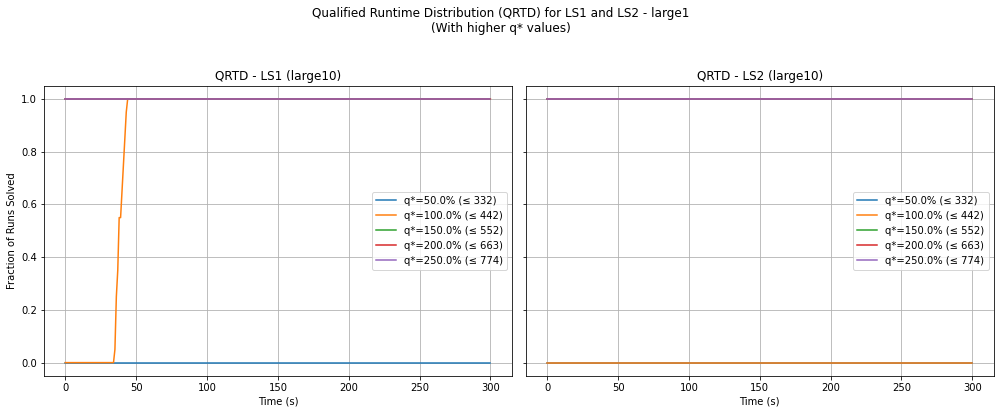

In [39]:
import os
import matplotlib.pyplot as plt
import numpy as np

# === CONFIG ===
opt = 50  # Given optimal
opt = 221
qstars = [50.0, 100.0, 150.0, 200.0, 250.0]  # Relative errors in %
n_runs = 20
max_time = 300
time_resolution = 1  # seconds
algorithms = {
    "LS1": "ls1_seed",
    "LS2": "ls2_seed"
}

def parse_trace(trace_path):
    times, qualities = [], []
    with open(trace_path, 'r') as f:
        for line in f:
            t, q = line.strip().split()
            times.append(float(t))
            qualities.append(int(q))
    return list(zip(times, qualities))

def get_success_times(trace, threshold):
    for t, q in trace:
        if q <= threshold:
            return t
    return float('inf')

def compute_qrt_curve(algorithm, qstar, dataset='large10'):
    folder_prefix = algorithms[algorithm]
    threshold = opt * (1 + qstar / 100)
    time_grid = np.arange(0, max_time + 1, time_resolution)
    success_times = []

    for seed in range(1, n_runs + 1):
        folder = f"{folder_prefix}{seed}"
        trace_path = f"{folder}/{dataset}_{algorithm}_300_{seed}.trace"
        trace = parse_trace(trace_path)
        success_time = get_success_times(trace, threshold)
        success_times.append(success_time)

    curve = []
    for t in time_grid:
        solved = sum(1 for st in success_times if st <= t)
        curve.append(solved / n_runs)
    return time_grid, curve, threshold

# === PLOTTING ===
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for idx, alg in enumerate(algorithms.keys()):
    ax = axes[idx]
    for qstar in qstars:
        time_grid, curve, threshold = compute_qrt_curve(alg, qstar)
        ax.plot(time_grid, curve, label=f"q*={qstar:.1f}% (≤ {threshold:.0f})")

    ax.set_title(f"QRTD - {alg} (large10)")
    ax.set_xlabel("Time (s)")
    ax.grid(True)
    ax.legend()
    if idx == 0:
        ax.set_ylabel("Fraction of Runs Solved")

plt.suptitle("Qualified Runtime Distribution (QRTD) for LS1 and LS2 - large1\n(With higher q* values)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("QRTD_large10_LS1_LS2_high_qstar.png")
plt.show()


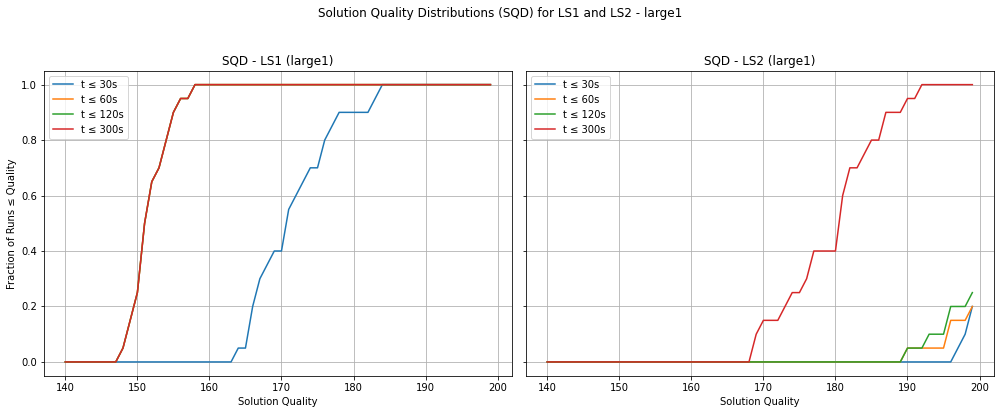

In [43]:
import os
import matplotlib.pyplot as plt
import numpy as np

# === CONFIG ===
dataset = 'large1'
algorithms = {
    "LS1": "ls1_seed",
    "LS2": "ls2_seed"
}
n_runs = 20
time_checkpoints = [30, 60, 120, 300]  # seconds
quality_range = np.arange(140, 200, 1)  # based on your earlier large1 results

def parse_trace(trace_path):
    times, qualities = [], []
    with open(trace_path, 'r') as f:
        for line in f:
            t, q = line.strip().split()
            times.append(float(t))
            qualities.append(int(q))
    return list(zip(times, qualities))

def get_best_quality_at_time(trace, t_limit):
    best_q = float('inf')
    for t, q in trace:
        if t <= t_limit:
            best_q = min(best_q, q)
        else:
            break
    return best_q if best_q != float('inf') else 9999  # Use a high placeholder for missing

def compute_sqd(algorithm):
    folder_prefix = algorithms[algorithm]
    data = {t: [] for t in time_checkpoints}

    for seed in range(1, n_runs + 1):
        folder = f"{folder_prefix}{seed}"
        trace_path = f"{folder}/{dataset}_{algorithm}_300_{seed}.trace"
        trace = parse_trace(trace_path)
        for t_limit in time_checkpoints:
            best_q = get_best_quality_at_time(trace, t_limit)
            data[t_limit].append(best_q)

    return data

# === PLOTTING ===
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for idx, alg in enumerate(algorithms.keys()):
    ax = axes[idx]
    sqd_data = compute_sqd(alg)

    for t_limit, best_qualities in sqd_data.items():
        cdf = [np.mean(np.array(best_qualities) <= q) for q in quality_range]
        ax.plot(quality_range, cdf, label=f"t ≤ {t_limit}s")

    ax.set_title(f"SQD - {alg} ({dataset})")
    ax.set_xlabel("Solution Quality")
    ax.grid(True)
    ax.legend()
    if idx == 0:
        ax.set_ylabel("Fraction of Runs ≤ Quality")

plt.suptitle(f"Solution Quality Distributions (SQD) for LS1 and LS2 - {dataset}")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(f"SQD_{dataset}_LS1_LS2.png")
plt.show()


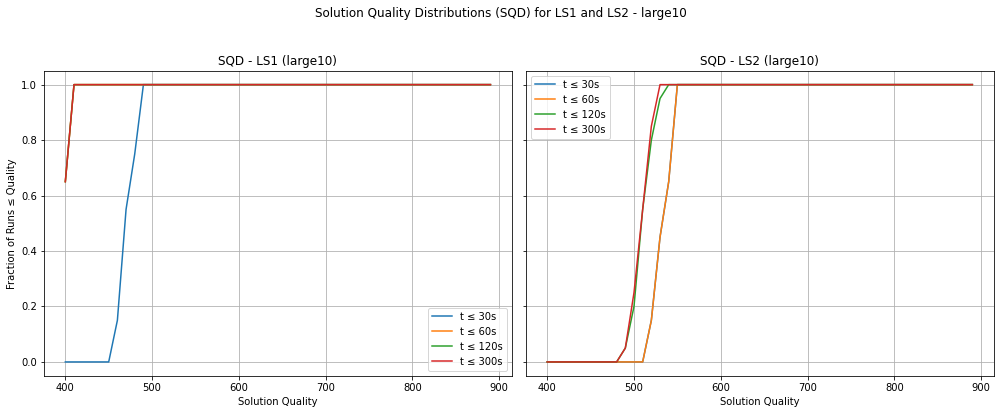

In [42]:
import os
import matplotlib.pyplot as plt
import numpy as np

# === CONFIG ===
dataset = 'large10'
algorithms = {
    "LS1": "ls1_seed",
    "LS2": "ls2_seed"
}
n_runs = 20
time_checkpoints = [30, 60, 120, 300]  # seconds
quality_range = np.arange(400, 900, 10)

def parse_trace(trace_path):
    times, qualities = [], []
    with open(trace_path, 'r') as f:
        for line in f:
            t, q = line.strip().split()
            times.append(float(t))
            qualities.append(int(q))
    return list(zip(times, qualities))

def get_best_quality_at_time(trace, t_limit):
    best_q = float('inf')
    for t, q in trace:
        if t <= t_limit:
            best_q = min(best_q, q)
        else:
            break
    return best_q if best_q != float('inf') else 9999  # Use a large placeholder

def compute_sqd(algorithm):
    folder_prefix = algorithms[algorithm]
    data = {t: [] for t in time_checkpoints}

    for seed in range(1, n_runs + 1):
        folder = f"{folder_prefix}{seed}"
        trace_path = f"{folder}/{dataset}_{algorithm}_300_{seed}.trace"
        trace = parse_trace(trace_path)
        for t_limit in time_checkpoints:
            best_q = get_best_quality_at_time(trace, t_limit)
            data[t_limit].append(best_q)

    return data

# === PLOTTING ===
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for idx, alg in enumerate(algorithms.keys()):
    ax = axes[idx]
    sqd_data = compute_sqd(alg)

    for t_limit, best_qualities in sqd_data.items():
        cdf = [np.mean(np.array(best_qualities) <= q) for q in quality_range]
        ax.plot(quality_range, cdf, label=f"t ≤ {t_limit}s")

    ax.set_title(f"SQD - {alg} ({dataset})")
    ax.set_xlabel("Solution Quality")
    ax.grid(True)
    ax.legend()
    if idx == 0:
        ax.set_ylabel("Fraction of Runs ≤ Quality")

plt.suptitle(f"Solution Quality Distributions (SQD) for LS1 and LS2 - {dataset}")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(f"SQD_{dataset}_LS1_LS2.png")
plt.show()


In [44]:
import os
import pandas as pd

def extract_runtimes(dataset, algorithms, n_runs=20):
    runtime_data = {alg: [] for alg in algorithms}

    for alg, prefix in algorithms.items():
        for seed in range(1, n_runs + 1):
            trace_path = f"{prefix}{seed}/{dataset}_{alg}_300_{seed}.trace"
            try:
                with open(trace_path, 'r') as f:
                    lines = f.readlines()
                    if lines:
                        last_time = float(lines[-1].strip().split()[0])
                        runtime_data[alg].append(last_time)
                    else:
                        runtime_data[alg].append(None)
            except FileNotFoundError:
                print(f"Missing: {trace_path}")
                runtime_data[alg].append(None)

    return pd.DataFrame(runtime_data)

# === CONFIG ===
algorithms = {
    "LS1": "ls1_seed",
    "LS2": "ls2_seed"
}

# === Generate and save CSVs ===
df_large1 = extract_runtimes("large1", algorithms)
df_large1.to_csv("large1_boxdata.csv", index=False)

df_large10 = extract_runtimes("large10", algorithms)
df_large10.to_csv("large10_boxdata.csv", index=False)

print("Saved: large1_boxdata.csv and large10_boxdata.csv")


Saved: large1_boxdata.csv and large10_boxdata.csv
